**Jeffrey Elkner**

**Descriptive Statistics**


The following comma-seperated value file, `GGS560_HW2_Data_Hurricane.csv`, was exported from an xls file which in turn was dervived from the NOAA/AOML web site at http://www.aoml.noaa.gov/hrd/tcfaq/E11.html. The data file contains the number of named storms in the Atlantic basin from 1851 to 2008 (2009 version of the data file).

> *Note:* The first row in the csv file contains the merged first two rows of the original xls file to fix a problem in the orginial with two of the column headings being incorrectly seperated.

In [1]:
import csv

with open('Data/GGS560_HW2_Data_Hurricane.csv') as csvfile:
    reader = csv.reader(csvfile)
    data = list(reader)

# Display the first 10 lines of this file to confirm it looks right
data[:10]

[['Year', 'Named Storms', 'Hurricanes', 'Major Hurricanes', 'ACE'],
 ['1851', '6', '3', '1', '36'],
 ['1852', '5', '5', '1', '73'],
 ['1853', '8', '4', '2', '76'],
 ['1854', '5', '3', '1', '31'],
 ['1855', '5', '4', '1', '18'],
 ['1856', '6', '4', '2', '49'],
 ['1857', '4', '3', '0', '43'],
 ['1858', '6', '6', '0', '45'],
 ['1859', '8', '7', '1', '61']]

(1) Display a vertical chart for the distribution of the number (the 2nd column) of named storms. That is, show the frequency of given numbers of named storm (a histogram plot [equivalent to Dot Plot] instead of a time series plot). Your plot should tell readers how many years in which there were a specific number of named storms from 1 to the maximum number). (3 points)

In [2]:
# SOLUTION: Solution:  Create a dictionary named_storms_frequency_counts
# with the number of named storms in a year as the key and the number
# of occurances of this as the value.

named_storms_frequency_counts = {}

for row in data[1:]:
    named_storms_count = int(row[1])
    if named_storms_count not in named_storms_frequency_counts:
        named_storms_frequency_counts[named_storms_count] = 1
    else:
        named_storms_frequency_counts[named_storms_count] += 1

named_storms_frequency_counts

{1: 1,
 2: 2,
 3: 3,
 4: 10,
 5: 16,
 6: 18,
 7: 16,
 8: 18,
 9: 13,
 10: 11,
 11: 18,
 12: 11,
 13: 5,
 14: 4,
 15: 4,
 16: 3,
 18: 1,
 19: 2,
 21: 1,
 28: 1}

In [3]:
# Turn named_storms_frequency_counts into a list with values set to the
# number of years in which a given frequency of named storms occurred,
# with the frequency stored implicitly as the list index.

max_count = max(named_storms_frequency_counts)

frequency_count_list = [named_storms_frequency_counts.get(i, 0)
                        for i in range(max_count + 1)]

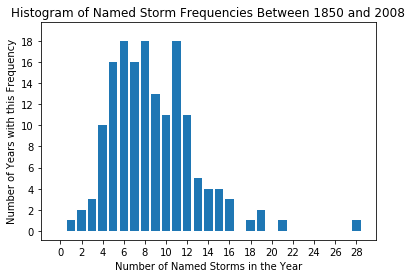

In [4]:
# Generate a histogram from these values.

import matplotlib.pyplot as plt

plt.bar(range(len(frequency_count_list)), frequency_count_list)
plt.title('Histogram of Named Storm Frequencies Between 1850 and 2008')
plt.xticks(range(0, 29, 2))
plt.xlabel('Number of Named Storms in the Year')
plt.yticks(range(0, 19, 2))
plt.ylabel('Number of Years with this Frequency')
plt.axis('equal')
plt.show()

(2) What is the mode (are the modes) of the number(s) of named storms? (2 points)

In [5]:
# SOLUTION: The modes will be the value(s) with the highest frequency
# in the list, so we iterate over the list indices and add those whose
# values match the maximum value to the mode list.

modes = [i for i in range(len(frequency_count_list))
         if frequency_count_list[i] == max(frequency_count_list)]
print(modes)

[6, 8, 11]


(3) Display a histogram of ACE data (the 5th column) distribution using ACE value ranges from 1 to 250 with an interval of 10 (i.e., the breaking points are 10, 20, 30, …, 240). (5 points)

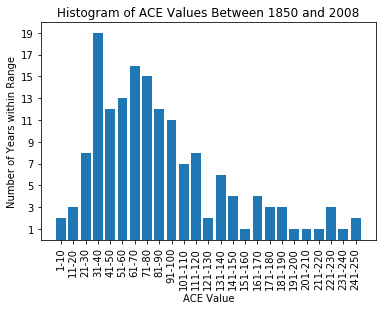

In [6]:
# SOLUTION: The histogram will have 25 bins, so create a list named
# ace_counts of length 25.

ace_counts = [0] * 25

# Then traverse the data set, incrementing the appropriate bin for each
# year. For most values, integer division of the ACE value by 10 will
# generate the appropriate bin, but the special case for multiples of 10
# will have to be handled.

for year in data[1:]:
    ace_value = int(year[4])
    # handle the multiple of 10 special case first
    if ace_value % 10 == 0:
        ace_counts[ace_value // 10 - 1] += 1
    else:
        ace_counts[ace_value // 10] += 1

xlabels = ['{0}-{1}'.format(i, i + 9) for i in range(1, 250, 10)]

plt.bar(range(len(ace_counts)), ace_counts)
plt.title('Histogram of ACE Values Between 1850 and 2008')
plt.xticks(range(0, len(ace_counts)), xlabels, rotation='vertical')
plt.xlabel('ACE Value')
plt.yticks(range(1, 20, 2))
plt.ylabel('Number of Years within Range')
plt.show()

(4) Find the midrange value and median of the number of named storms. (4 points)

In [7]:
# SOLUTION: Create a list with the number of named storms
# (column 2 in the original data)
num_named_storms = [int(year[1]) for year in data[1:]]

# The midrange is the midpoint between the min and max values.
midrange = (min(num_named_storms) + max(num_named_storms)) / 2.0
midrange

14.5

In [8]:
# Computing the median is easier with a function. Use python's built-in
# sorted(...) function to arrange the values from least to greatest.
# Find the mid index using integer division (//). Use the modulus operator
# (%) to determine if the number of items in the data set is odd or even,
# and either return the middle element or the average of the middle two
# respectively.

def median(original_data):
    data = sorted(original_data)
    mid = len(data) // 2
    if len(data) % 2 == 0:   # data has even number of values
        return (data[mid - 1] + data[mid]) / 2
    return data[mid]

print(median(num_named_storms))

8.0


(5) Compute the mean number of storms for the whole period and two sub-time-periods, 1970-1994 and 1995-2008. 

> Note: Since this assignment is for practice of computing descriptive statistics, intermediate steps should be included with the final results. The detail level should be similar to the level showed in TABLE 3-5 on Page 112 (attached). (6 points)

In [9]:
# SOLUTION
# Compute the mean number of storms for the whole period using
# Python's built-in sum(...) function to get the sum of the values
# in the data set, and the len(...) function to get the number of
# values.  Use round(...) to round to two significant digits.

mean = sum(num_named_storms) / len(num_named_storms)
round(mean, 2)

8.79

In [10]:
# Compute the mean for the sub-time-period 1970-1994.
# First create a list of the values for the years between 1970 and
# 1994 using a list comprehension, then compute the mean as in the
# previous example.

num_named_storms_1970_94 = [int(year[1]) for year in data[1:]
                            if 1970 <= int(year[0]) <= 1994]

mean = sum(num_named_storms_1970_94) / len(num_named_storms_1970_94)
round(mean, 2)

9.28

In [11]:
# Compute the mean for the sub-time-period 1995-2008

num_named_storms_1995_2008 = [int(year[1]) for year in data[1:]
                              if 1995 <= int(year[0]) <= 2008]

mean = sum(num_named_storms_1995_2008) / len(num_named_storms_1995_2008)
round(mean, 2)

14.86